In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install py_distance_transforms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.4/397.4 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)

In [4]:
from py_distance_transforms import transform, transform_cuda

[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/py_distance_transforms/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ~1.9, =1.10.0, ~1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.10.3 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.3-linux-x86_64.tar.gz
             download complete
[julia

In [5]:
from scipy.ndimage import distance_transform_edt

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import torch

## 2D

In [7]:
# Configure the range of sizes for 2D and 3D
range_size_2D = np.logspace(2, 12, 10, base=2, dtype=int)
range_size_3D = np.logspace(2, 8, 10, base=2, dtype=int)

In [8]:
# Initialize arrays to store the results
sizes = []
dt_scipy = []
dt_pydt_single = []
dt_pydt_multi = []
dt_pydt_cuda = []

# 2D benchmarks
for n in range_size_2D:
    print(f"Running benchmark for size: {n}")
    sizes.append(n**2)
    f = np.random.randint(0, 2, size=(n, n)).astype(np.float32)

    # SciPy distance_transform_edt
    t_scipy = timeit.timeit(lambda: distance_transform_edt(f), number=10)
    dt_scipy.append(t_scipy * 1e9 / 10)  # Convert to nanoseconds

    # py_distance_transforms CPU single-threaded
    t_pydt_single = timeit.timeit(lambda: transform(f), number=10)
    dt_pydt_single.append(t_pydt_single * 1e9 / 10)  # Convert to nanoseconds

    # py_distance_transforms CPU multi-threaded
    t_pydt_multi = timeit.timeit(lambda: transform(f), number=10)
    dt_pydt_multi.append(t_pydt_multi * 1e9 / 10)  # Convert to nanoseconds

    # py_distance_transforms CUDA
    if torch.cuda.is_available():
        f_cuda = torch.from_numpy(f).cuda()
        t_pydt_cuda = timeit.timeit(lambda: transform_cuda(f_cuda), number=10)
        dt_pydt_cuda.append(t_pydt_cuda * 1e9 / 10)  # Convert to nanoseconds
    else:
        dt_pydt_cuda.append(np.nan)

Running benchmark for size: 4
Running benchmark for size: 8
Running benchmark for size: 18
Running benchmark for size: 40
Running benchmark for size: 87
Running benchmark for size: 188
Running benchmark for size: 406
Running benchmark for size: 877
Running benchmark for size: 1896
Running benchmark for size: 4096


In [9]:
# 3D benchmarks
sizes_3D = []
dt_scipy_3D = []
dt_pydt_single_3D = []
dt_pydt_multi_3D = []
dt_pydt_cuda_3D = []

for n in range_size_3D:
    print(f"Running benchmark for size: {n}")
    sizes_3D.append(n**3)
    f = np.random.randint(0, 2, size=(n, n, n)).astype(np.float32)

    # SciPy distance_transform_edt
    t_scipy_3D = timeit.timeit(lambda: distance_transform_edt(f), number=10)
    dt_scipy_3D.append(t_scipy_3D * 1e9 / 10)  # Convert to nanoseconds

    # py_distance_transforms CPU single-threaded
    t_pydt_single_3D = timeit.timeit(lambda: transform(f), number=10)
    dt_pydt_single_3D.append(t_pydt_single_3D * 1e9 / 10)  # Convert to nanoseconds

    # py_distance_transforms CPU multi-threaded
    t_pydt_multi_3D = timeit.timeit(lambda: transform(f), number=10)
    dt_pydt_multi_3D.append(t_pydt_multi_3D * 1e9 / 10)  # Convert to nanoseconds

    # py_distance_transforms CUDA
    if torch.cuda.is_available():
        f_cuda = torch.from_numpy(f).cuda()
        t_pydt_cuda_3D = timeit.timeit(lambda: transform_cuda(f_cuda), number=10)
        dt_pydt_cuda_3D.append(t_pydt_cuda_3D * 1e9 / 10)  # Convert to nanoseconds
    else:
        dt_pydt_cuda_3D.append(np.nan)

Running benchmark for size: 4
Running benchmark for size: 6
Running benchmark for size: 10
Running benchmark for size: 16
Running benchmark for size: 25
Running benchmark for size: 40
Running benchmark for size: 64
Running benchmark for size: 101
Running benchmark for size: 161
Running benchmark for size: 256


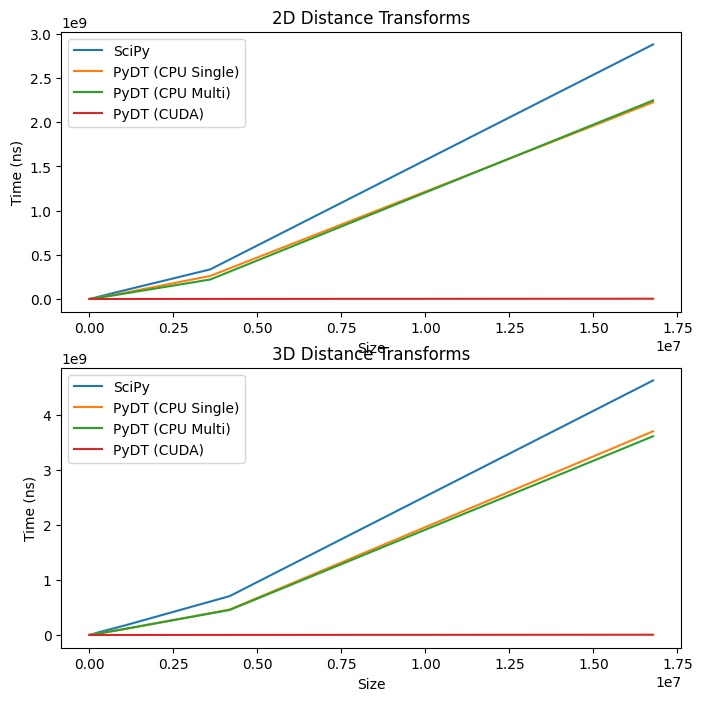

In [35]:
# Create a matplotlib plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.plot(sizes, dt_scipy, label='SciPy')
ax1.plot(sizes, dt_pydt_single, label='PyDT (CPU Single)')
ax1.plot(sizes, dt_pydt_multi, label='PyDT (CPU Multi)')
if torch.cuda.is_available():
    ax1.plot(sizes, dt_pydt_cuda, label='PyDT (CUDA)')
ax1.set_xlabel('Size')
ax1.set_ylabel('Time (ns)')
ax1.set_title('2D Distance Transforms')
ax1.legend()

ax2.plot(sizes_3D, dt_scipy_3D, label='SciPy')
ax2.plot(sizes_3D, dt_pydt_single_3D, label='PyDT (CPU Single)')
ax2.plot(sizes_3D, dt_pydt_multi_3D, label='PyDT (CPU Multi)')
if torch.cuda.is_available():
    ax2.plot(sizes_3D, dt_pydt_cuda_3D, label='PyDT (CUDA)')
ax2.set_xlabel('Size')
ax2.set_ylabel('Time (ns)')
ax2.set_title('3D Distance Transforms')
ax2.legend()

In [36]:
df_dt = pd.DataFrame({
    'sizes': sizes,
    'dt_scipy': dt_scipy,
    'dt_pydt_single': dt_pydt_single,
    'dt_pydt_multi': dt_pydt_multi,
    'dt_pydt_cuda': dt_pydt_cuda,
    'sizes_3D': sizes_3D,
    'dt_scipy_3D': dt_scipy_3D,
    'dt_pydt_single_3D': dt_pydt_single_3D,
    'dt_pydt_multi_3D': dt_pydt_multi_3D,
    'dt_pydt_cuda_3D': dt_pydt_cuda_3D
})

In [39]:
# Save the DataFrame to a CSV file
if torch.cuda.is_available():
    accelerator = 'CUDA'
else:
    accelerator = 'CPU'

csv_filename = f"/content/drive/MyDrive/dev/MolloiLab/distance-transforms-paper/data/new/dt_py_{accelerator}.csv"
df_dt.to_csv(csv_filename, index=False)